#Código Morse
Desarrollar un algoritmo que permita decodificar mensajes en código morse, para ello deberá resolver las siguientes consignas:


1. Genere un árbol que contenga todo el alfabeto y los dígitos del 0 al 9, cuyos códigos morse están en la siguiente figura:

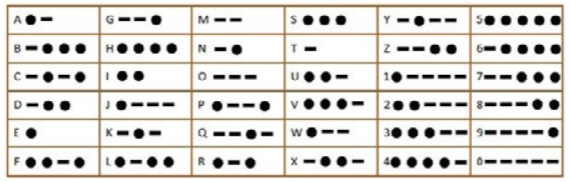

2. Cada nodo del árbol contendrá una letra o un digito, el cual se debe construir de manera manual, cuya raíz es vacía y, a partir de esta, la izquierda significa **punto** y la derecha **guion** y se cargaran según su codificación morse, como se observa en la siguiente figura

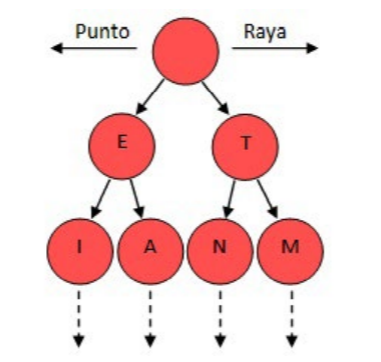

3. El espacio separa cada letra de una palabra y la “/” separa cada palabra;

4. Ejemplo:

-- .. / -.-. .- ... .- / . ... / ... ..- /  -.-. .- ... .-
Mi casa es su casa

In [1]:
#@title Clase de arboles
class Tree:

    def __init__(self, label, branches=[]):
        for b in branches:
            assert isinstance(b, Tree)
        self.label = label
        self.branches = list(branches)

    def is_leaf(self):
        return not self.branches

    def __repr__(self):
        if self.branches:
            branch_str = ', ' + repr(self.branches)
        else:
            branch_str = ''
        return 'Tree({0}{1})'.format(self.label, branch_str)

    def __str__(self):
        def print_tree(t, indent=0):
            tree_str = '  ' * indent + str(t.label) + "\n"
            for b in t.branches:
                tree_str += print_tree(b, indent + 1)
            return tree_str
        return print_tree(self).rstrip()

    def left(self):
      """
      Retorna el hijo izquierdo de un nodo
      """
      return self.branches[0]

    def right(self):
      """
      Retorna el hijo derecho de un nodo
      """
      return self.branches[1]

In [2]:
arbol_morse = Tree(None, [Tree('e', [Tree('i', [Tree('s', [Tree('h', [Tree('5'),
                                                                      Tree('4')]),
                                                           Tree('v', [Tree(None),
                                                                      Tree('3')])]),
                                                Tree('u', [Tree('f'),
                                                           Tree(None, [Tree(None),
                                                                       Tree('2')])])]),
                                     Tree('a', [Tree('r', [Tree('l'),
                                                           Tree(None, [Tree('')])]),
                                                Tree('w', [Tree('p'),
                                                           Tree('j', [Tree(None),
                                                                      Tree('1')])])])]),
                          Tree('t', [Tree('n', [Tree('d', [Tree('b', [Tree('6')]),
                                                           Tree('x')]),
                                                Tree('k', [Tree('c'),
                                                           Tree('y')])]),
                                     Tree('m', [Tree('g', [Tree('z', [Tree('7')]),
                                                           Tree('q')]),
                                                Tree('o', [Tree(None, [Tree('8')]),
                                                           Tree(None, [Tree('9'),
                                                                       Tree('0')])])])])])

In [3]:
def camino(nodo, caracter):
  """
  Sigue el camino que va indicando la letra en código morse.
  Si hay un punto, sigue por el hijo izquierdo, si hay una raya, sigue por el hijo derecho.

  Args:
    nodo - Nodo del árbol en el que estamos parados
    caracter - Punto o raya

  Returns:
    nodo que sigue el camino indicado por el caracter
  """
  if caracter == '.': return nodo.left()
  elif caracter == '-': return nodo.right()
  else: pass

In [13]:
def Codigo_Morse(s):
    """Traduce el código morse
    >>> s = -- .. / -.-. .- ... .- / . ... / ... ..- /  -.-. .- ... .-
    >>> Codigo_Morse(s)
    mi casa es su casa
    """

    """
    El programa inicialmente recorre los caracteres separados por espacio.
    Luego, recorre esos caracteres mediante la función camino.
    Cuando llega al final, agrega la letra indicada a la frase.
    Si hay un / agrega un espacio.

    Args:
      s - cadena en código morse
    Returns:
      cadena con la frase traducida
    """
    walk = arbol_morse
    traduccion = ''
    for caracter in s.split():
      if caracter == '/':
        traduccion += ' '
      else:
        for i in caracter:
          try:
            walk = camino(walk, i)
          except:
            return 'No se puede hacer la traducción'

        traduccion += walk.label
        walk = arbol_morse

    return traduccion

In [16]:
s = '-- .. / -.-. .- ... .- / . ... / ... ..- /  -.-. .- ... .-'

In [17]:
Codigo_Morse(s)

'mi casa es su casa'

In [18]:
Codigo_Morse('. ... - .-. ..- -.-. - ..- .-. .- ... / . ... / -- ..- -.-- / -.-. .... . ...- . .-. . .-.-.')

'estructuras es muy chevere'